In [1]:
import pandas as pd
df=pd.read_csv('titanic-passengers.csv',sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 62.7+ KB


In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
df['Embarked'].fillna('S',inplace=True)
df=df.drop(columns=["Cabin","Ticket","PassengerId"],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S


In [6]:
#making a copy to visualize categorical and numerical data correlations
df1=df.copy()
#transforming categorical data to numerical ones
onehotenc=pd.get_dummies(df["Survived"])
df=df.drop("Survived",axis=1)
df=df.join(onehotenc)
onehotenc1=pd.get_dummies(df["Sex"])
df=df.drop("Sex",axis=1)
df=df.join(onehotenc1)
onehotenc2=pd.get_dummies(df["Embarked"])
df=df.drop("Embarked",axis=1)
df=df.join(onehotenc2)
df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,No,Yes,female,male,C,Q,S
0,2,"Collander, Mr. Erik Gustaf",28.0,0,0,13.0000,1,0,0,1,0,0,1
1,3,"Moen, Mr. Sigurd Hansen",25.0,0,0,7.6500,1,0,0,1,0,0,1
2,3,"Jensen, Mr. Hans Peder",20.0,0,0,7.8542,1,0,0,1,0,0,1
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",29.0,0,4,21.0750,1,0,1,0,0,0,1
4,1,"Davidson, Mr. Thornton",31.0,1,0,52.0000,1,0,0,1,0,0,1


In [7]:
df=df.rename(columns={"No":"Unsurvived","Yes":"Survived"})
df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Unsurvived,Survived,female,male,C,Q,S
0,2,"Collander, Mr. Erik Gustaf",28.0,0,0,13.0000,1,0,0,1,0,0,1
1,3,"Moen, Mr. Sigurd Hansen",25.0,0,0,7.6500,1,0,0,1,0,0,1
2,3,"Jensen, Mr. Hans Peder",20.0,0,0,7.8542,1,0,0,1,0,0,1
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",29.0,0,4,21.0750,1,0,1,0,0,0,1
4,1,"Davidson, Mr. Thornton",31.0,1,0,52.0000,1,0,0,1,0,0,1


In [8]:
df1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


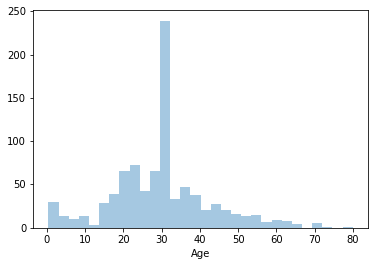

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df1["Age"],kde=False)

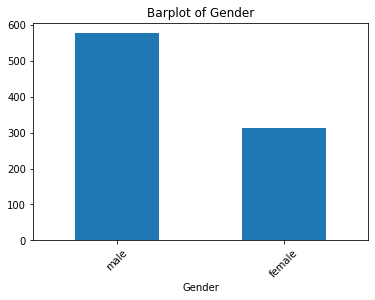

In [10]:
plt.xlabel("Gender")
plt.title("Barplot of Gender")
bp=df1["Sex"].value_counts()
bp.plot.bar(rot=45)

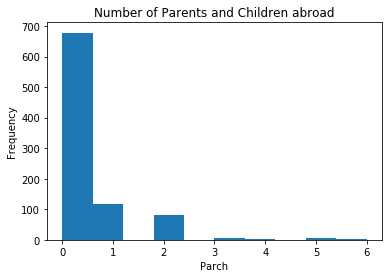

In [11]:
plt.title("Number of Parents and Children abroad")
plt.xlabel("Parch")
df1["Parch"].plot.hist()

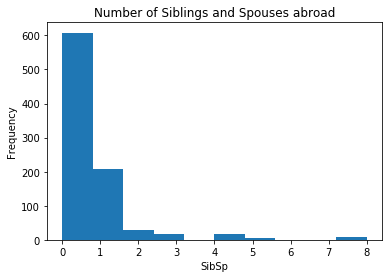

In [12]:
plt.title("Number of Siblings and Spouses abroad")
plt.xlabel("SibSp")
df1["SibSp"].plot.hist()

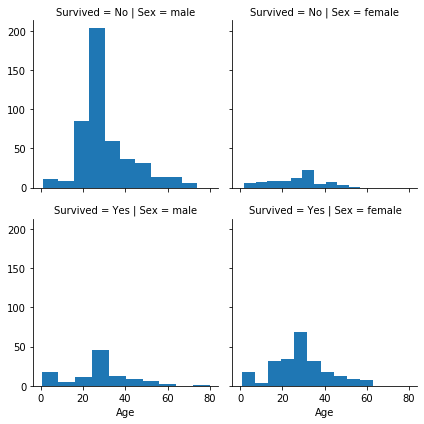

In [13]:
FacetGrid = sns.FacetGrid(df1,col='Sex', row='Survived')
FacetGrid.map(plt.hist,'Age')

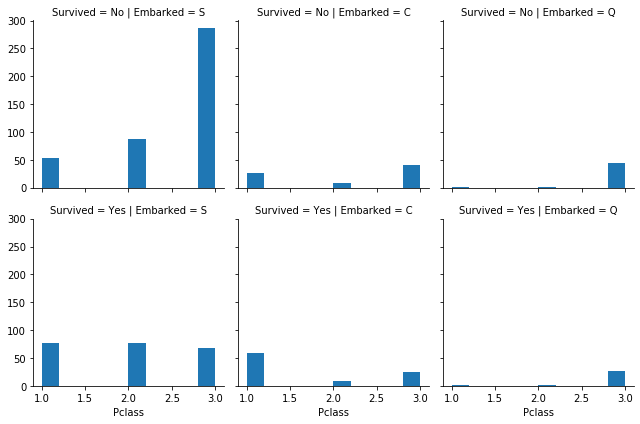

In [14]:
FacetGrid = sns.FacetGrid(df1,col='Embarked', row='Survived')
FacetGrid.map(plt.hist,'Pclass')

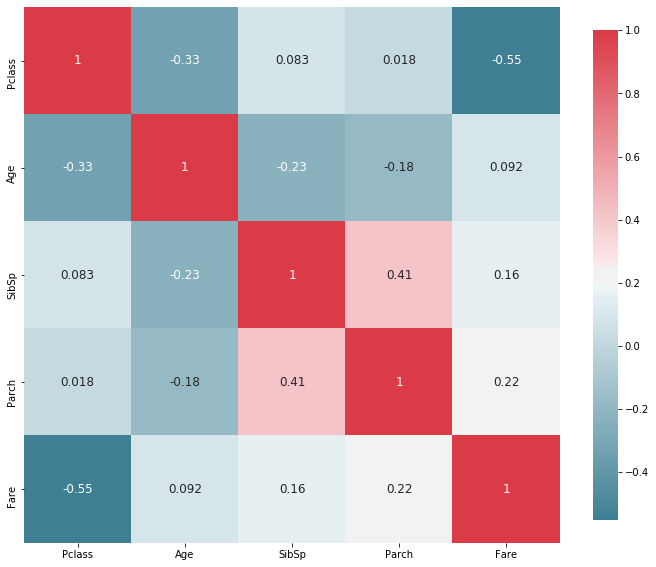

In [15]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(df1)

This function establishes a correlogram that helps us study different relations between various features in order to decide which inputs we should choose for our predictive model.In fact Pclass is moderately correlated to Fare (-0.55).It is quite logical that when you pay more you get a better Pclass which means moving from a third class to a second or a first one and that explains the negative sign of the correlation ratio.Age has a low negative correlation ratio(-0.33),this may be explained by the fact that older persons have more paid jobs than younger ones due to carrier development and experience.And ,so they are more likely to pay for the most luxurious classes abroad the Titanic.On the other hand, the number of persons choosing their Pclass isn't very important whether it is a family or single person.So, Pclass has a negligeable correlation with Parch and SibSp (0.083,0.018). -Age has a weakly correlated to SibSp and Parch (-0.23,-0.18) since an old passenger won't prbably tavel abroad Titanic with his parents or siblings.Logically, when age raises the number of siblings,spouses,parents or children decreases.The correlation ratio hasn't the same tendency when we talk about the relation between Age and the Fare paid, which is a marginal and positive one.This divergence can have the same explanation as Pclass-Age correlation had.The older you are the higher ability you gain to pay bigger amounts. -SibSp is moderately interrelated to Parch (with a correlation ratio equal to 0.41)due to family relationships( because many of the spouses are parents of many children who are siblings , many of the siblings may have spouses and so on...). -Fares has a weak positive correlation ratio with SibSp and Parch (0.16,0.22) that can be justified by the number of persons abroad when we speak about SibSp or Parch traveling.And so, they will pay higher fares than a person traveling alone.

In [16]:
df1[["Pclass","Survived"]].groupby(["Survived"],as_index=True).mean()

,Pclass
Survived,
No,2.531876
Yes,1.950292


In [17]:
df=df.drop("Name",axis=1)
df.head()

,Pclass,Age,SibSp,Parch,Fare,Unsurvived,Survived,female,male,C,Q,S
0,2,28.0,0,0,13.0000,1,0,0,1,0,0,1
1,3,25.0,0,0,7.6500,1,0,0,1,0,0,1
2,3,20.0,0,0,7.8542,1,0,0,1,0,0,1
3,3,29.0,0,4,21.0750,1,0,1,0,0,0,1
4,1,31.0,1,0,52.0000,1,0,0,1,0,0,1


In [18]:
df2=df1["Name"].str.extract(pat="([A-Za-z]+)\.")
df=df.join(df2)
df=df.rename(columns={0:"Title"})
df.head()

,Pclass,Age,SibSp,Parch,Fare,Unsurvived,Survived,female,male,C,Q,S,Title
0,2,28.0,0,0,13.0000,1,0,0,1,0,0,1,Mr
1,3,25.0,0,0,7.6500,1,0,0,1,0,0,1,Mr
2,3,20.0,0,0,7.8542,1,0,0,1,0,0,1,Mr
3,3,29.0,0,4,21.0750,1,0,1,0,0,0,1,Mrs
4,1,31.0,1,0,52.0000,1,0,0,1,0,0,1,Mr


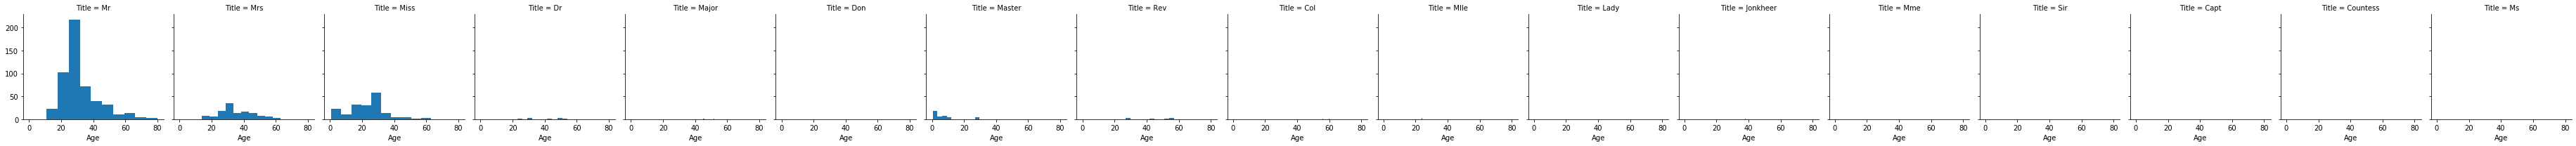

In [19]:
FacetGrid = sns.FacetGrid(df,col='Title')
FacetGrid.map(plt.hist,'Age')

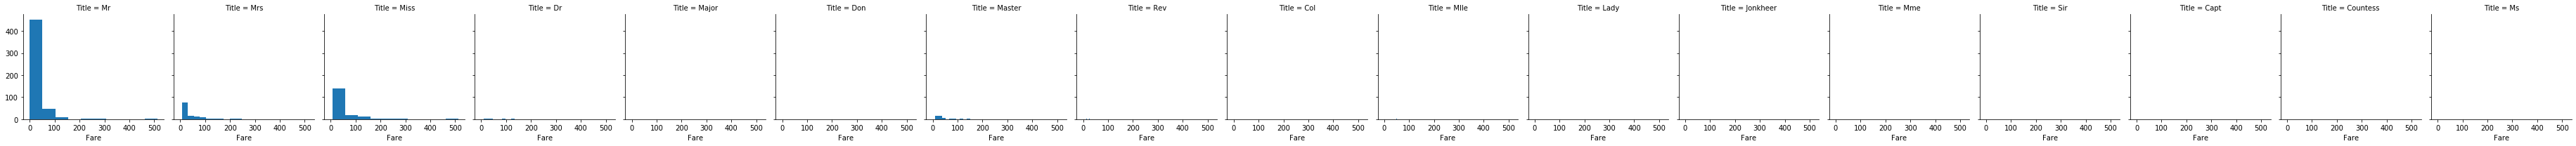

In [20]:
FacetGrid = sns.FacetGrid(df,col='Title')
FacetGrid.map(plt.hist,'Fare')

In [21]:
df["Title"].replace({ """Capt""":"""Officer""", """Col""":  """Officer""",  
                     """Major""":  """Officer""",  """Dr""": """Officer""",  
                     """Rev""": """Officer""", 
                     """Jonkheer""":   """Royalty""", 
                     """Don""":   """Royalty""",    """Sir""" :   """Royalty""",   
                     """Lady""" :   """Royalty""",  """the Countess""" : """Royalty""",    
                     """Dona""":  """Royalty""",  
                     """Mme""":    """Miss""",    """Mlle""":   """Miss""",   """Miss""" :    
                     """Miss""",  """Ms""":   """Mrs""", """Mr""" :    """Mrs""", 
                     """Mrs""" :       """Mrs""",   
                     """Master""" :    """Master""" },inplace=True)
df.head()

,Pclass,Age,SibSp,Parch,Fare,Unsurvived,Survived,female,male,C,Q,S,Title
0,2,28.0,0,0,13.0000,1,0,0,1,0,0,1,Mrs
1,3,25.0,0,0,7.6500,1,0,0,1,0,0,1,Mrs
2,3,20.0,0,0,7.8542,1,0,0,1,0,0,1,Mrs
3,3,29.0,0,4,21.0750,1,0,1,0,0,0,1,Mrs
4,1,31.0,1,0,52.0000,1,0,0,1,0,0,1,Mrs


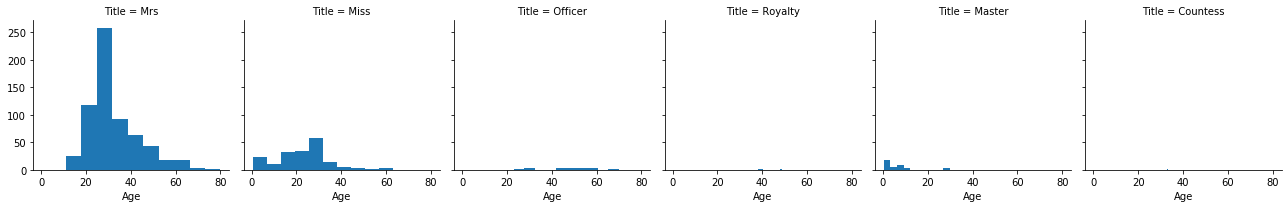

In [22]:
FacetGrid = sns.FacetGrid(df,col='Title')
FacetGrid.map(plt.hist,'Age')

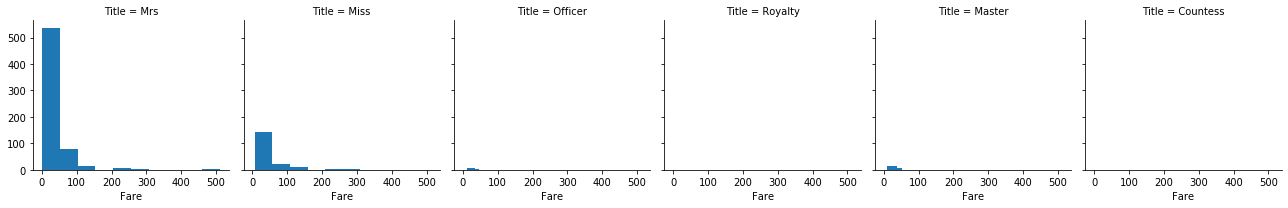

In [23]:
FacetGrid = sns.FacetGrid(df,col='Title')
FacetGrid.map(plt.hist,'Fare')

In [24]:
df["Family Size"]=df["SibSp"]+df["Parch"]+1
df.head()

,Pclass,Age,SibSp,Parch,Fare,Unsurvived,Survived,female,male,C,Q,S,Title,Family Size
0,2,28.0,0,0,13.0000,1,0,0,1,0,0,1,Mrs,1
1,3,25.0,0,0,7.6500,1,0,0,1,0,0,1,Mrs,1
2,3,20.0,0,0,7.8542,1,0,0,1,0,0,1,Mrs,1
3,3,29.0,0,4,21.0750,1,0,1,0,0,0,1,Mrs,5
4,1,31.0,1,0,52.0000,1,0,0,1,0,0,1,Mrs,2


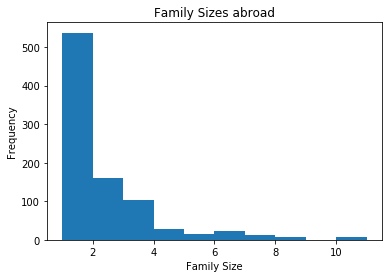

In [25]:
plt.title("Family Sizes abroad")
plt.xlabel("Family Size")
df["Family Size"].plot.hist()

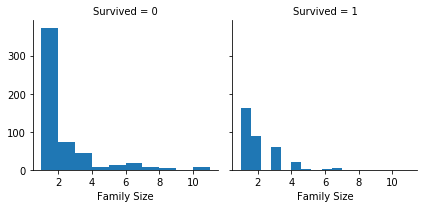

In [26]:
FacetGrid = sns.FacetGrid(df,col='Survived')
FacetGrid.map(plt.hist,'Family Size')

In [27]:
df["Family Size"].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: Family Size, dtype: float64

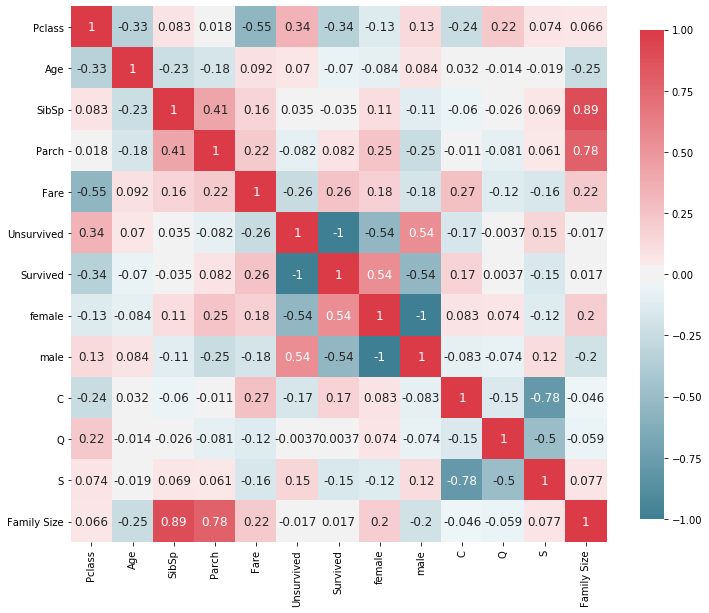

In [28]:
plot_correlation_map(df)

The Family Size feature is useful for our study.In fact, the Family Size histogram and the description below give us a small idea about the marital status of passengers abroad but emphasizes especially on the family sizes there on the boat (from single passengers to families of 11 members were present on the Titanic).Furthermore, the second last graph shows us that traveling with your whole family abroad the Titanic wasn't a good idea especially for big families. Indeed, larger families weren't able to make it and be in its entirely among survivors.So, most of the lucky persons were there at their own, or with 1 ,2 or maximum 6 of their family members.For their part,families with 8,9 or 10 members abroad weren't able to make it and survive the iceberg accident. Speaking about the correlation with different features, Family Size has mainly a strong correlation ratio with SibSp and Parch which is very logical when we know that family sizes are derived from them both.Family Size is also moderately correlated with Gender, Age and Fare inputs.Yet, the relation between FS and the remaining features is way too negligeable. So,all the graphs,metrics and description given by Python might favour Family Size and promote it as one of the useful features for our predictive model.